In [78]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
import struct

###############################################################
# LINUX PATH

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/tmp/tmpk5h94zk2/')) #Current directory

###############################################################
# WINDOWS PATH

# spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = importlib.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/Caio/Documents/GitHub/Photonics-training/Projects/Microring resonator/LumericalFiles/'))
# spec_win.loader.exec_module(lumapi)

## Lumapi init
Warning: Before initiating, check if this notebook is in the same .icp file folder

In [79]:
ring = lumapi.INTERCONNECT(filename='CHIP.icp',hide=False) 

## Getting and saving results (from INTERCONNECT)

dict_keys(['wavelength', 'frequency', 'TE gain (dB)', 'Lumerical_dataset'])


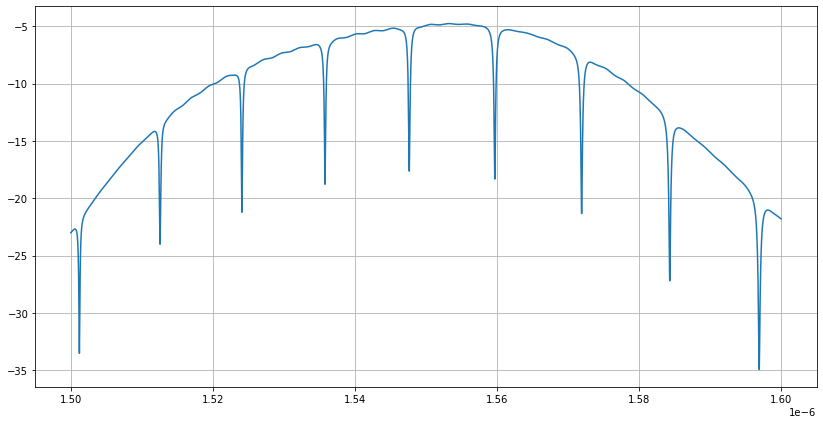

In [80]:
dataname = 'LengthGain_L18'
datapath = 'InterSavedData'

dataset = ring.getresult('ONA_1','input 1/mode 1/gain')
print(dataset.keys())

xdata = dataset['wavelength']
ydata = dataset['TE gain (dB)']
plt.figure(figsize=(14, 7))
plt.plot(xdata,ydata)
plt.grid(True)

plotdata = [0,0]
plotdata[0] = xdata
plotdata[1] = ydata

completeName = os.path.join(datapath, str(dataname) + ' Data')
MSOutfile = open(completeName,'wb')
plk.dump(plotdata,MSOutfile)
MSOutfile.close()

## Loading and plotting results

### Loading

In [81]:
datapath = 'InterSavedData'
loadFiles = ['RefGain', 
'PassGain1_1','PassGain1_2','PassGain1_3','PassGain1_4',
'DropGain1_1','DropGain1_2','DropGain1_3','DropGain1_4',
'LengthGain_L0','LengthGain_L6','LengthGain_L12','LengthGain_L18'] # Folder to load

loadPath = datapath
file_count = sum(len(files) for _, _, files in os.walk(loadPath))
data = {}
print('files found: '+str(file_count))

for i in range(len(loadFiles)):
    infile = open(os.path.join(loadPath, loadFiles[i]+' Data') , 'rb')
    data[loadFiles[i]] = plk.load(infile)
    infile.close()
    
#print(data)
dataFrame = pd.DataFrame(data)
dataFrame

files found: 13


,RefGain,PassGain1_1,PassGain1_2,PassGain1_3,PassGain1_4,DropGain1_1,DropGain1_2,DropGain1_3,DropGain1_4,LengthGain_L0,LengthGain_L6,LengthGain_L12,LengthGain_L18
0,"[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999...","[[1.6e-06], [1.5999989333340446e-06], [1.59999..."
1,"[-21.866315464541465, -21.8655508909689, -21.8...","[-22.106118147881226, -22.105681614950118, -22...","[-22.464273218626715, -22.46418629214249, -22....","[-22.73259955901228, -22.732446669572788, -22....","[-23.032850421477207, -23.033263090894277, -23...","[-39.22898422720752, -39.22296844765694, -39.2...","[-48.740614811161585, -48.73329957449207, -48....","[-62.289606993867075, -62.278961258299745, -62...","[-75.75810366228492, -75.74415985973172, -75.7...","[-22.00916822956261, -22.008816821192415, -22....","[-21.886622833809994, -21.886153967430474, -21...","[-21.829041950772034, -21.828521543837972, -21...","[-21.79759558325309, -21.797047743864503, -21...."


### Pass Series

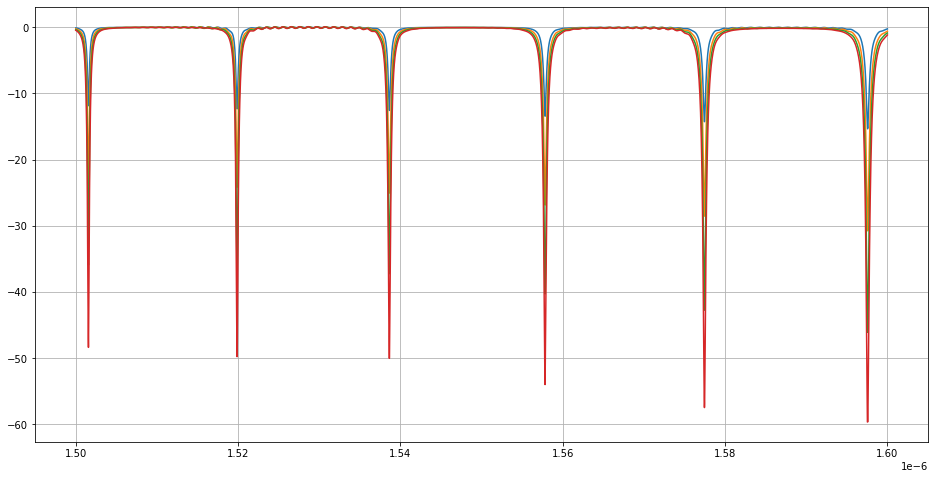

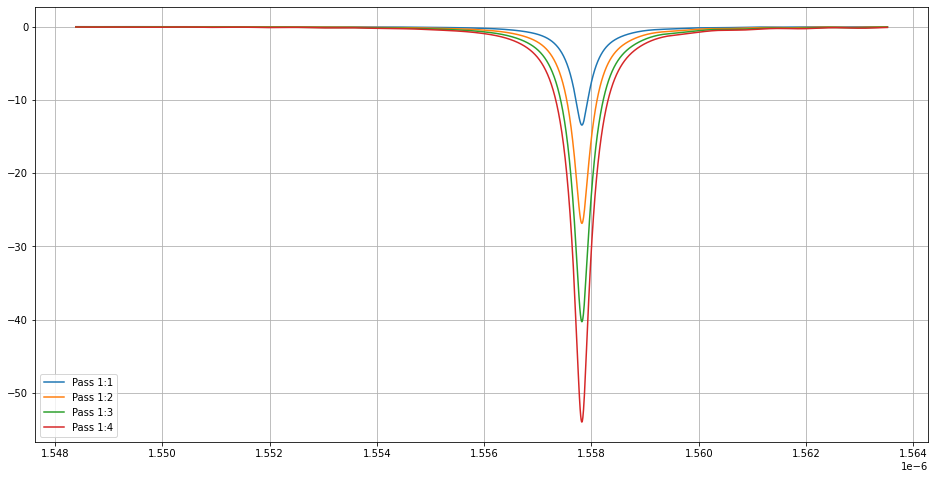

In [82]:
plt.figure(figsize=(16, 8))
plt.grid(True)
for i in range(4):
    plt.plot(data['RefGain'][0],data[loadFiles[i+1]][1] - data['RefGain'][1])

plt.figure(figsize=(16, 8))
plt.grid(True)
for i in range(4):
    plt.plot(data['RefGain'][0][35000:50000],data[loadFiles[i+1]][1][35000:50000] - data['RefGain'][1][35000:50000], label='Pass 1:' + str(i+1))
    plt.legend()

### Drop Series

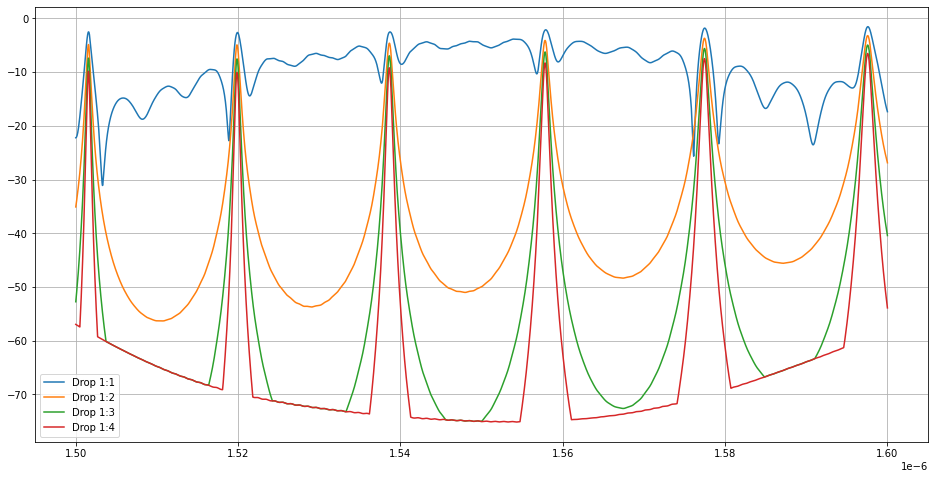

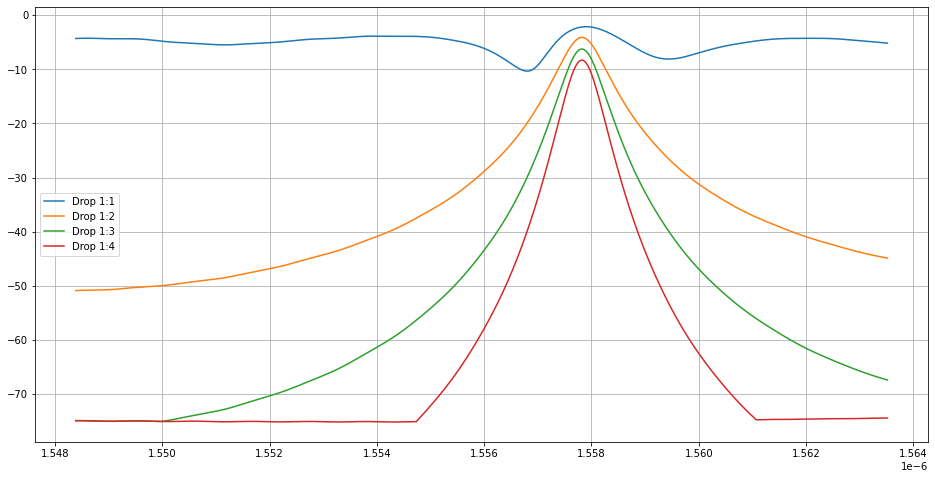

In [83]:
plt.figure(figsize=(16, 8))
plt.grid(True)
for i in range(4):
    plt.plot(data['RefGain'][0],data[loadFiles[i+5]][1] - data['RefGain'][1], label='Drop 1:' + str(i+1))
    plt.legend()

plt.figure(figsize=(16, 8))
plt.grid(True)
for i in range(4):
    plt.plot(data['RefGain'][0][35000:50000],data[loadFiles[i+5]][1][35000:50000] - data['RefGain'][1][35000:50000], label='Drop 1:' + str(i+1))
    plt.legend()

### Length Series

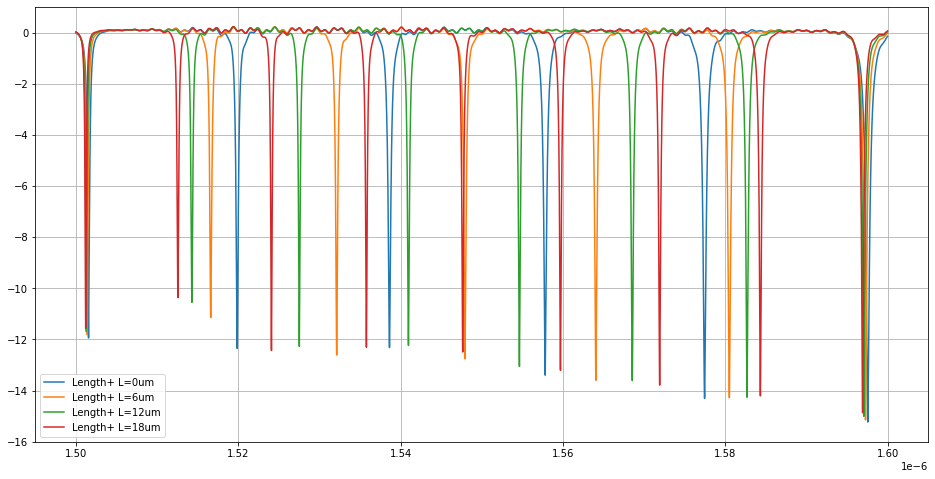

In [86]:
plt.figure(figsize=(16, 8))
plt.grid(True)
for i in range(4):
    plt.plot(data['RefGain'][0],data[loadFiles[i+9]][1] - data['RefGain'][1], label='Length+ L=' + str(i*6) + 'um')
    plt.legend()